In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
# Merge the datasets
customer_transactions = pd.merge(transactions, customers, on='CustomerID')
all_data = pd.merge(customer_transactions, products, on='ProductID')

In [4]:
# Feature engineering
customer_features = all_data.groupby('CustomerID').agg(
    TotalSpending=('TotalValue', 'sum'),
    AvgTransactionValue=('TotalValue', 'mean'),
    PurchaseFrequency=('TransactionID', 'count'),
)


In [5]:
customer_features = customer_features.reset_index()
customer_features = pd.merge(customer_features, customers[['CustomerID', 'Region']], on='CustomerID')


In [6]:
# One-hot encode categorical features
customer_features = pd.get_dummies(
    customer_features,
    columns=['Region'],
    prefix='Region_'
)


In [7]:
# Scale the features
scaler = StandardScaler()
numerical_features = customer_features.select_dtypes(include=np.number)
scaled_features = scaler.fit_transform(numerical_features)


In [8]:
# Determine the optimal number of clusters using the below method
inertia = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)


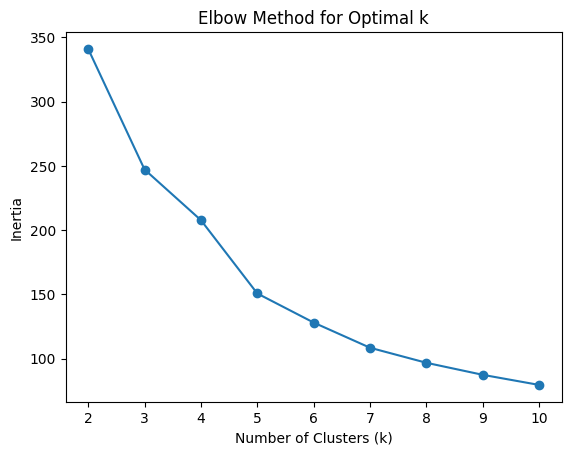

In [9]:
# Plot the below curve
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

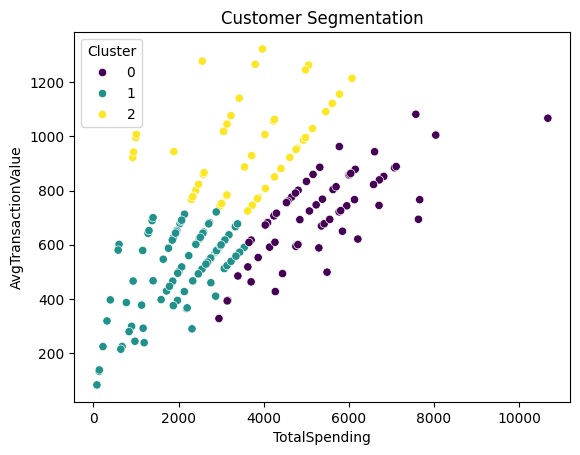

Number of Clusters: 3
Davies-Bouldin Index: 0.9578205962311451


In [10]:
# Choose the optimal number of clusters based on the below curve
optimal_k = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

# Calculate the Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, customer_features['Cluster'])

# Visualize the clusters
sns.scatterplot(
    x='TotalSpending',
    y='AvgTransactionValue',
    hue='Cluster',
    data=customer_features,
    palette='viridis',
)
plt.title('Customer Segmentation')
plt.show()

# Report on clustering results
print(f'Number of Clusters: {optimal_k}')
print(f'Davies-Bouldin Index: {db_index}')
